In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
# Add figure size defaults for better readability
plt.rcParams['figure.figsize'] = (12, 8)
# Set a higher DPI for clearer plots
plt.rcParams['figure.dpi'] = 100

In [2]:
# Load the dataset from CSV file
df = pd.read_csv('Mall_Customers.csv')
# Display the first 5 rows to check the data structure
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Fix the typo in column name from 'Genre' to 'Gender'
df.rename(columns={'Genre':'Gender'}, inplace=True)

In [4]:
# Display the updated dataframe to confirm changes
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check the dimensions of the dataframe (rows, columns)
df.shape

(200, 5)

In [6]:
# Get statistical summary of the numerical columns
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Check data types of all columns
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
# Check for missing values in each column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Remove CustomerID as it doesn't provide analytical value
df.drop(["CustomerID"], axis=1, inplace=True)

In [10]:
# Display the dataframe after dropping CustomerID
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


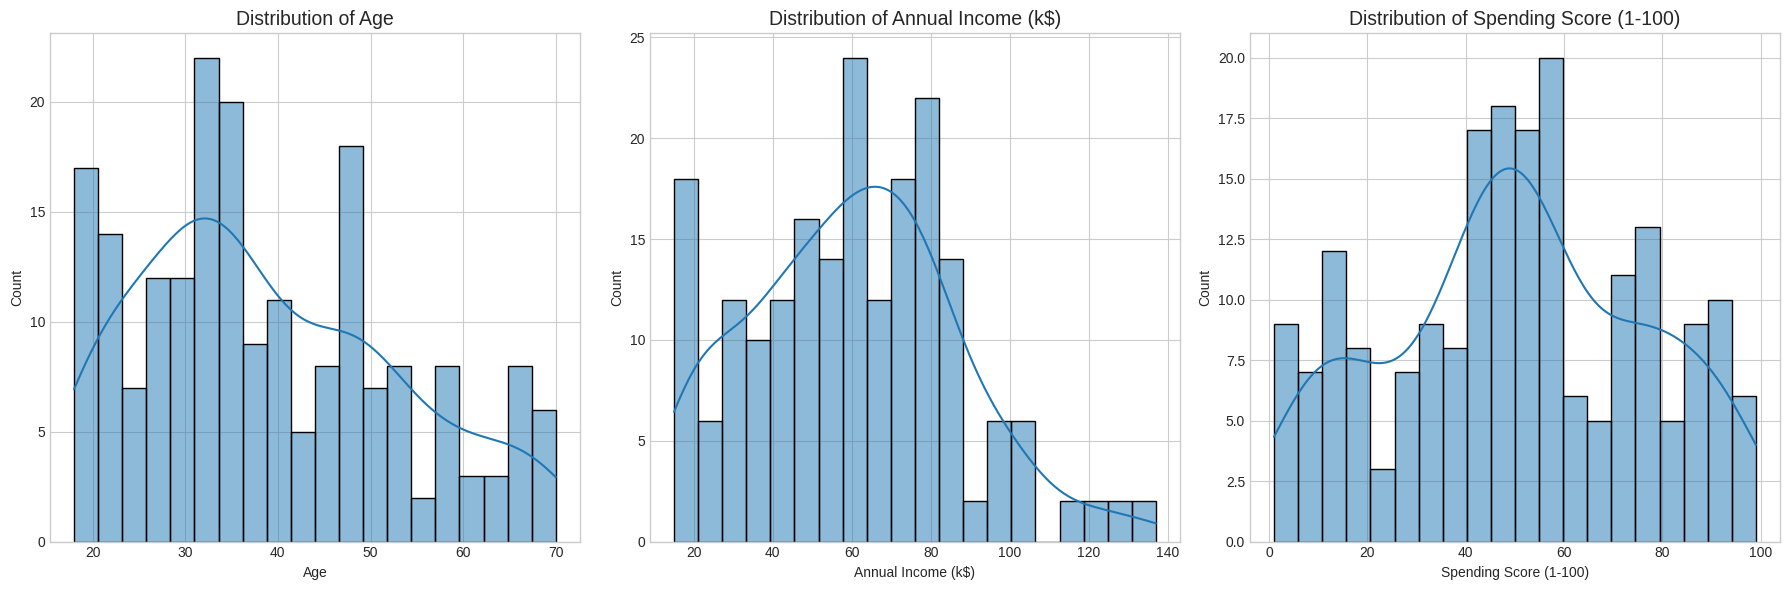

In [11]:
# Create distribution plots for numerical variables
plt.figure(figsize=(18, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    # Use kdeplot instead of distplot (which is deprecated)
    sns.histplot(df[x], kde=True, bins=20)
    plt.title(f'Distribution of {x}', fontsize=14)
plt.tight_layout()
plt.show()

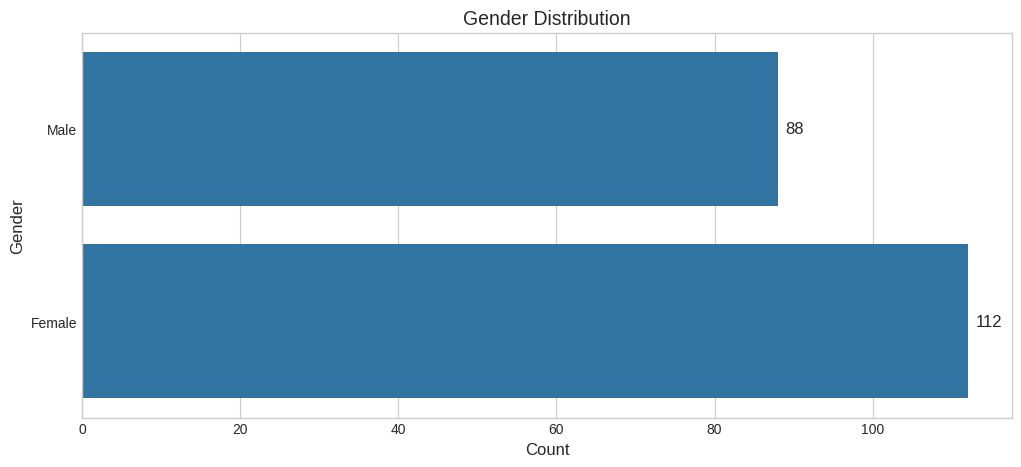

In [12]:
# Count plot showing gender distribution
plt.figure(figsize=(12, 5))
ax = sns.countplot(y='Gender', data=df)
# Add count labels to the bars
for i, p in enumerate(ax.patches):
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height()/2, f'{int(width)}', 
            ha='left', va='center', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.show()

/tmp/ipykernel_104160/1453306752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols, y='Gender', data=df, palette='Set2')
/tmp/ipykernel_104160/1453306752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols, y='Gender', data=df, palette='Set2')
/tmp/ipykernel_104160/1453306752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols, y='Gender', data=df, palette='Set2')


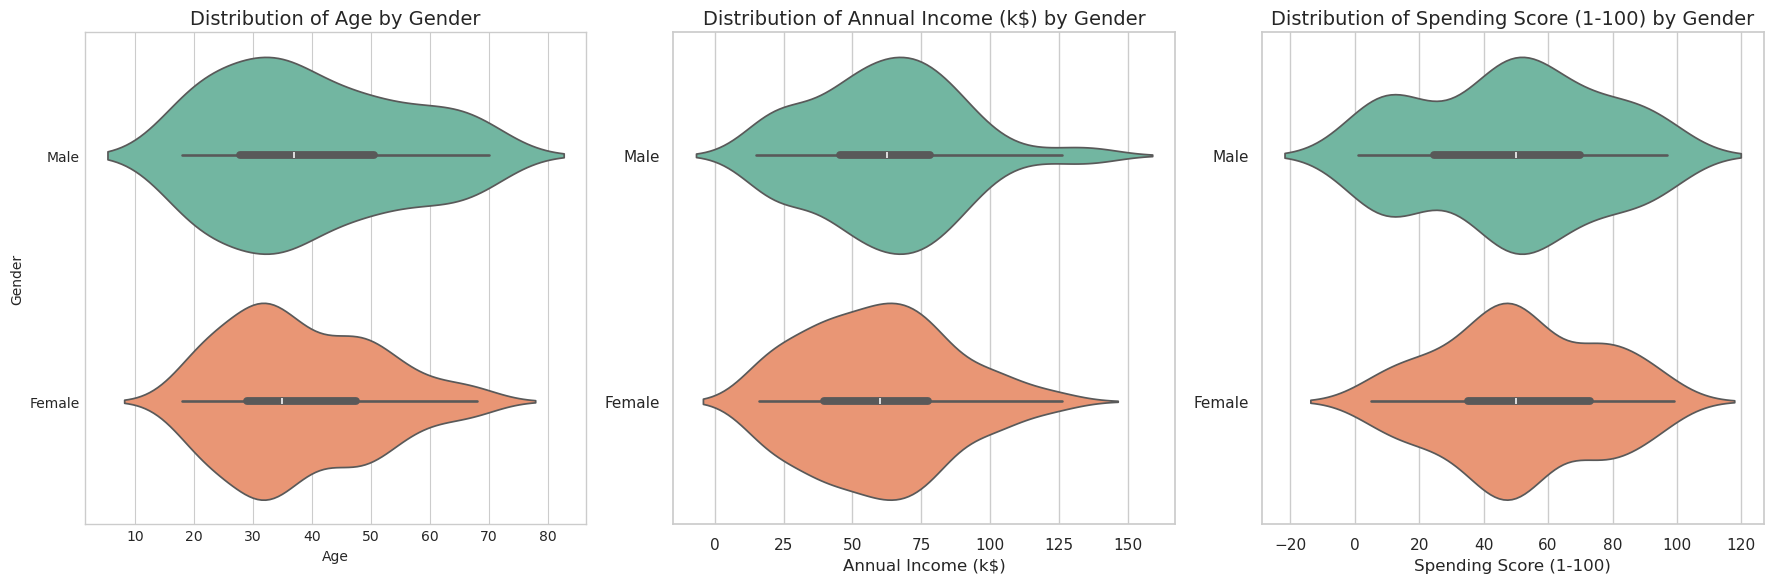

In [13]:
# Create violin plots to compare distributions by gender
plt.figure(figsize=(18, 6))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df, palette='Set2')
    plt.ylabel('Gender' if n == 1 else '')
    plt.title(f'Distribution of {cols} by Gender', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_104160/3513270640.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette="mako")


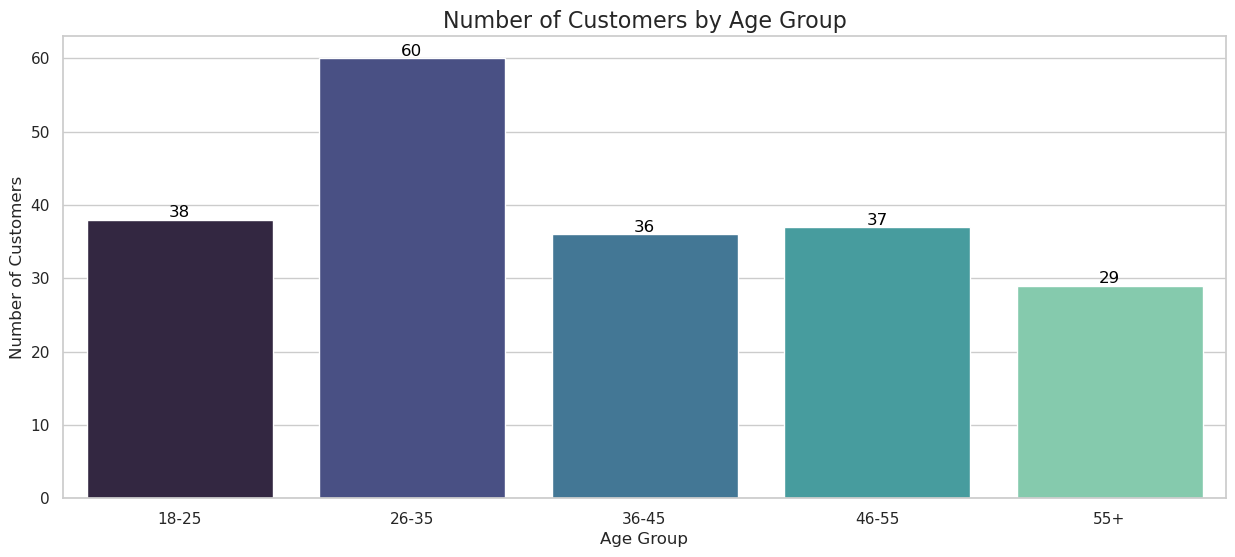

In [14]:
# Age group analysis - create age groups and visualize
age_bins = [(18, 25), (26, 35), (36, 45), (46, 55), (56, 100)]
age_labels = ["18-25", "26-35", "36-45", "46-55", "55+"]

# Create age group column for future use
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[17, 25, 35, 45, 55, 100], 
                         labels=age_labels)

# Count customers in each age group
age_counts = df['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette="mako")
# Add count labels to the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Number of Customers by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

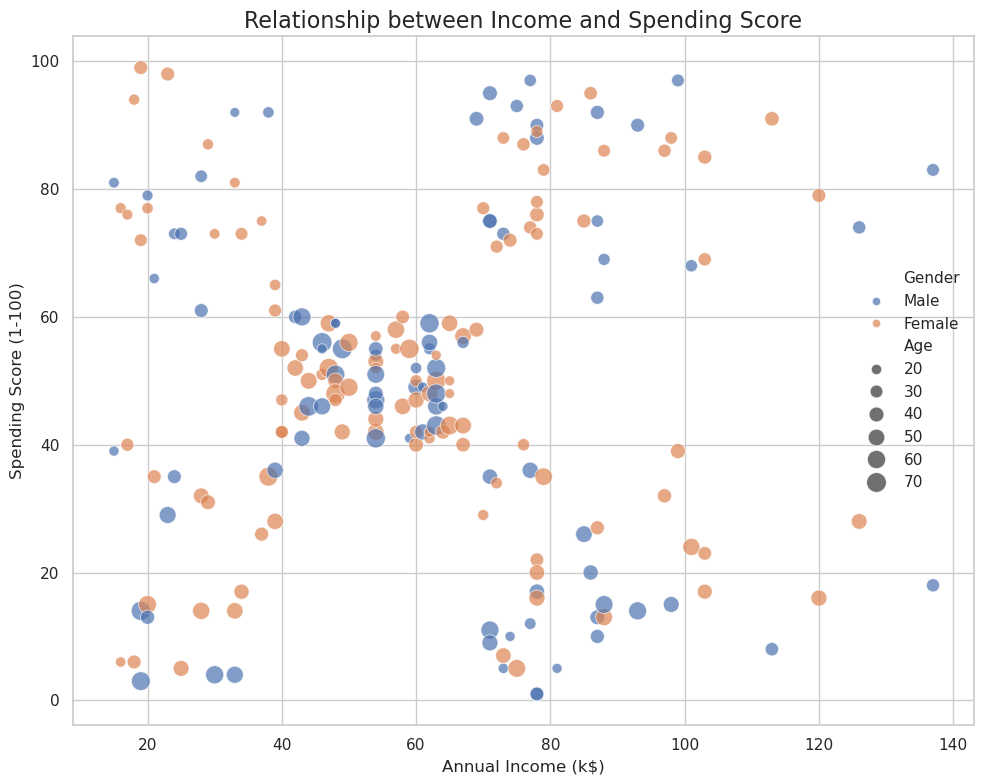

In [15]:
# Visualize relationship between Annual Income and Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", 
               data=df, hue="Gender", size="Age", sizes=(50, 200), alpha=0.7)
plt.title('Relationship between Income and Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title_fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_104160/1440693502.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=score_counts.index, y=score_counts.values, palette="rocket")


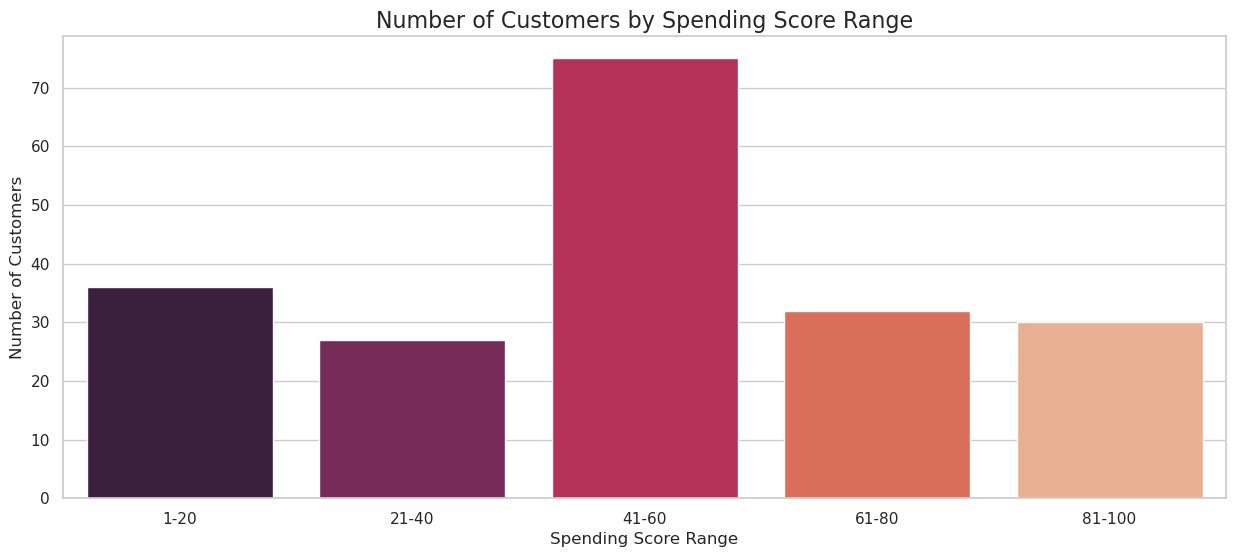

In [16]:
# Spending Score analysis - create groups and visualize
score_bins = [(1, 20), (21, 40), (41, 60), (61, 80), (81, 100)]
score_labels = ["1-20", "21-40", "41-60", "61-80", "81-100"]

# Create spending score group column for future use
df['Spending_Group'] = pd.cut(df['Spending Score (1-100)'], 
                            bins=[0, 20, 40, 60, 80, 100], 
                            labels=score_labels)

# Count customers in each spending group
score_counts = df['Spending_Group'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
ax = sns.barplot(x=score_counts.index, y=score_counts.values, palette="rocket")
# Add count labels to the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
plt.title("Number of Customers by Spending Score Range", fontsize=16)
plt.xlabel("Spending Score Range", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

/tmp/ipykernel_104160/2803315109.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=income_counts.index, y=income_counts.values, palette="Spectral")


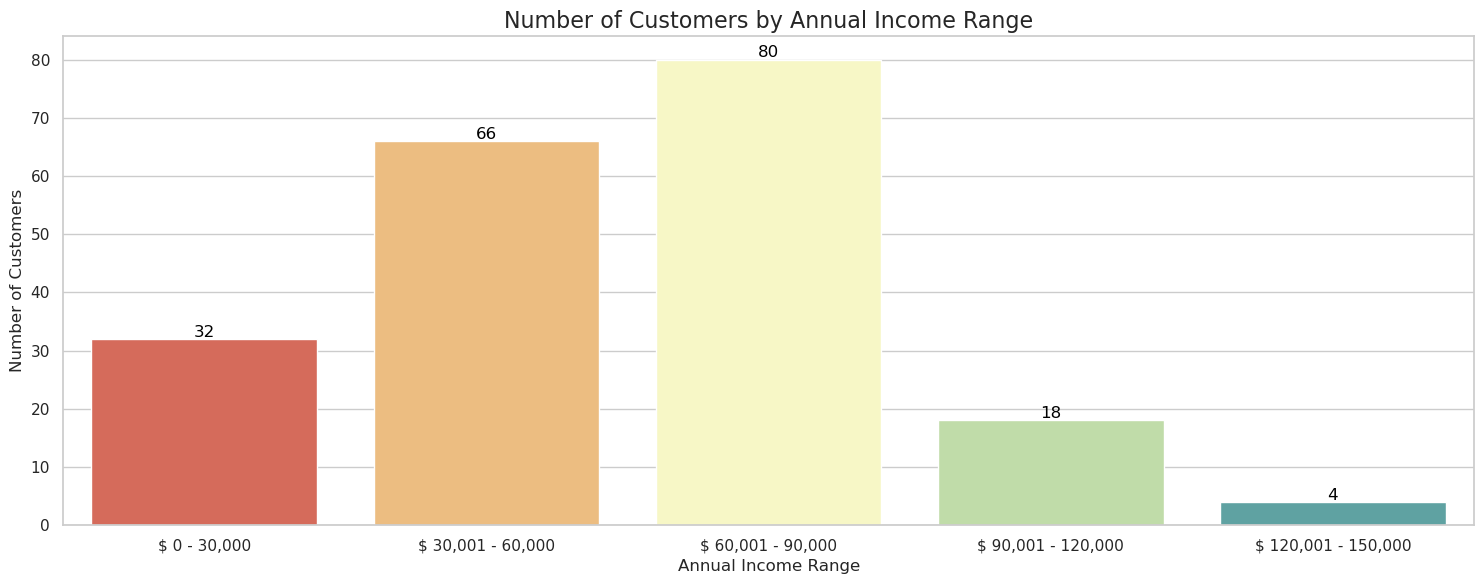

In [17]:
# Annual Income analysis - create income groups and visualize
income_bins = [(0, 30), (31, 60), (61, 90), (91, 120), (121, 150)]
income_labels = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", 
               "$ 90,001 - 120,000", "$ 120,001 - 150,000"]

# Create income group column for future use
df['Income_Group'] = pd.cut(df['Annual Income (k$)'], 
                          bins=[0, 30, 60, 90, 120, 150], 
                          labels=income_labels)

# Count customers in each income group
income_counts = df['Income_Group'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
ax = sns.barplot(x=income_counts.index, y=income_counts.values, palette="Spectral")
# Add count labels to the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Number of Customers by Annual Income Range", fontsize=16)
plt.xlabel("Annual Income Range", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.tight_layout()
plt.show()

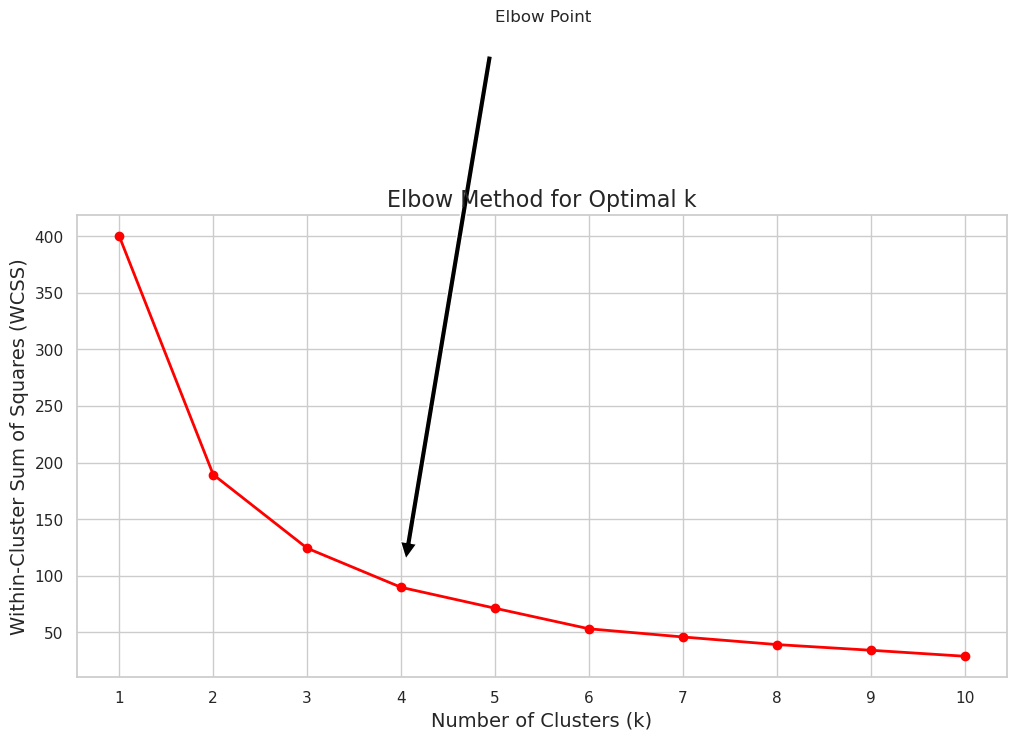

In [18]:
# K-Means Clustering - Age vs Spending Score
# Extract relevant features
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data for better clustering
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Determine optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="o")
plt.xlabel("Number of Clusters (k)", fontsize=14)
plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=14)
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xticks(range(1, 11))
plt.annotate('Elbow Point', xy=(4, wcss[3]), xytext=(5, wcss[3]+500),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [19]:
# Apply K-Means with k=4 (based on elbow method)
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42, n_init=10)
# Fit to the data and predict clusters
labels = kmeans.fit_predict(X1_scaled)
# Display the cluster assignments
print("Cluster assignments:", labels)

Cluster assignments: [0 1 0 1 0 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 0 1 3 1 3 1 2 1 3 0 0 0 3 1 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 1 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 1 1 0 1 2 1 2 1 2 1 0 1 0 1 2 1 0 1 2 1 0 1 0 1 3 1
 0 1 2 1 2 1 2 1 2 1 2 1 3 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 0
 1 2 1 2 1 0 1 2 1 2 1 2 1 0 1]


In [20]:
# Get cluster centers (in original scale)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centers (Age, Spending Score):")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

Cluster centers (Age, Spending Score):
Cluster 0: [27.22 40.04]
Cluster 1: [30.29230769 79.81538462]
Cluster 2: [47.60526316 15.        ]
Cluster 3: [55.9787234 48.5106383]


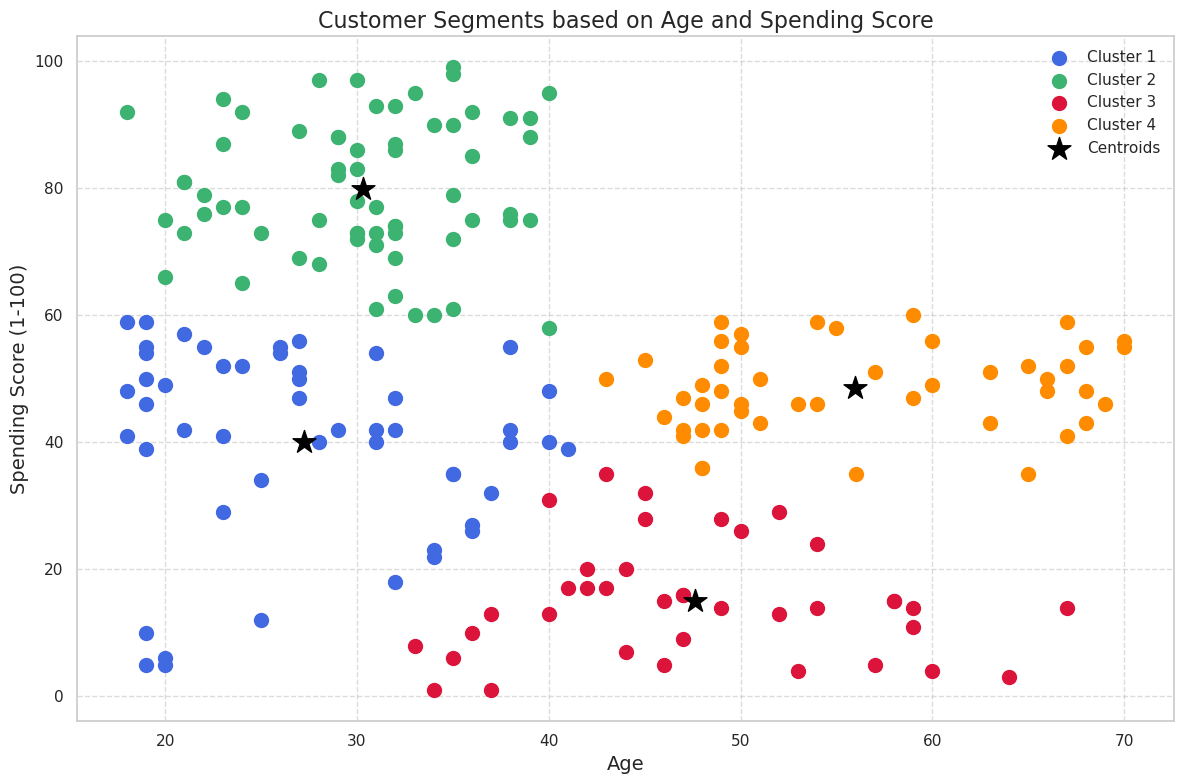

In [21]:
# Visualize the clusters - Age vs Spending Score
plt.figure(figsize=(12, 8))
# Define a custom colormap for better visibility
colors = ['royalblue', 'mediumseagreen', 'crimson', 'darkorange']
# Plot data points with cluster colors
for i in range(4):
    plt.scatter(X1[labels == i, 0], X1[labels == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')
# Plot centroids
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='black', marker='*', label='Centroids')
plt.title('Customer Segments based on Age and Spending Score', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
# Try K-Means with k=5 for comparison
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42, n_init=10)
# Fit to the data and predict clusters
labels = kmeans.fit_predict(X1_scaled)
# Display the cluster assignments
print("Cluster assignments with k=5:", labels)

Cluster assignments with k=5: [2 1 2 1 2 1 3 1 3 1 4 1 3 1 3 1 2 1 3 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3
 1 3 1 4 1 0 1 3 1 0 2 2 2 0 1 2 4 0 0 0 4 2 0 4 2 4 0 4 2 0 4 2 2 4 0 4 4
 4 2 0 0 2 0 4 0 4 0 2 0 0 2 1 0 4 2 0 0 2 2 0 2 0 2 2 0 4 2 0 2 4 0 4 4 4
 2 0 2 2 2 4 0 0 0 2 0 0 1 2 1 0 1 3 1 3 1 2 1 2 1 3 1 2 1 3 1 2 1 2 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [23]:
# Get cluster centers for k=5 (in original scale)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centers (Age, Spending Score) for k=5:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

Cluster centers (Age, Spending Score) for k=5:
Cluster 0: [47.13888889 46.44444444]
Cluster 1: [30.140625 80.15625 ]
Cluster 2: [24.13157895 41.84210526]
Cluster 3: [45.43902439 15.53658537]
Cluster 4: [64.95238095 48.14285714]


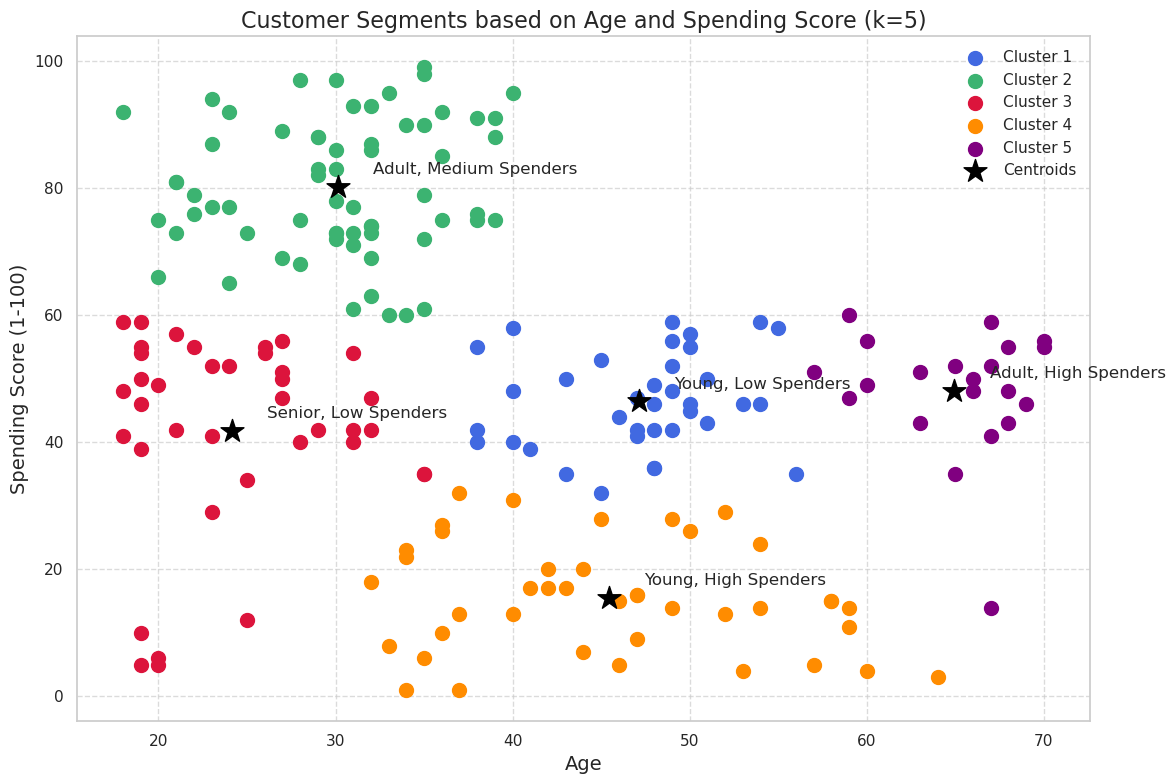

In [24]:
# Visualize the clusters with k=5
plt.figure(figsize=(12, 8))
# Define a custom colormap for better visibility
colors = ['royalblue', 'mediumseagreen', 'crimson', 'darkorange', 'purple']
# Plot data points with cluster colors
for i in range(5):
    plt.scatter(X1[labels == i, 0], X1[labels == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')
# Plot centroids
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='black', marker='*', label='Centroids')
# Add cluster descriptions
cluster_descriptions = {
    0: "Young, Low Spenders",
    1: "Adult, Medium Spenders",
    2: "Senior, Low Spenders",
    3: "Young, High Spenders",
    4: "Adult, High Spenders"
}
for i, center in enumerate(centers):
    plt.annotate(cluster_descriptions[i], 
                xy=(center[0], center[1]), 
                xytext=(center[0]+2, center[1]+2),
                fontsize=12)
plt.title('Customer Segments based on Age and Spending Score (k=5)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

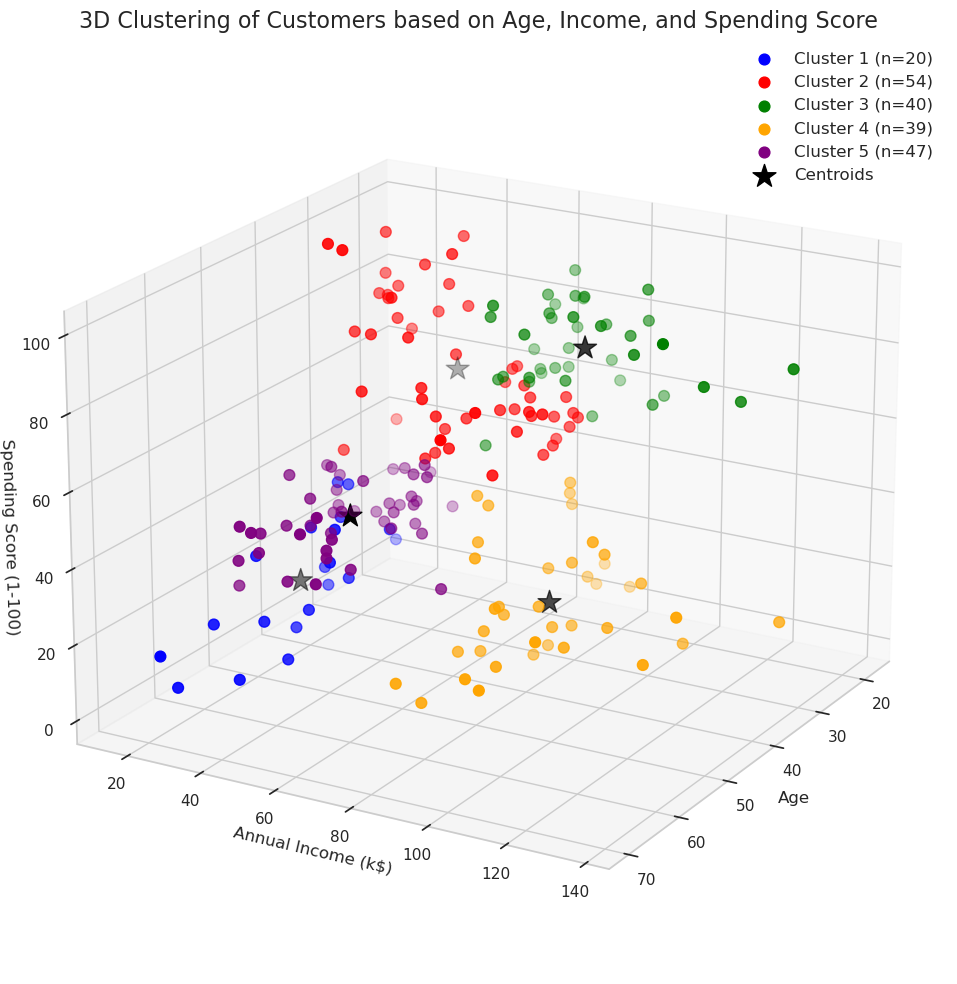

In [25]:
# 3D clustering - Age, Annual Income, and Spending Score
X3 = df.loc[:, ["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

# Standardize the data for better clustering
scaler_3d = StandardScaler()
X3_scaled = scaler_3d.fit_transform(X3)

# Apply K-Means with k=5
kmeans_3d = KMeans(n_clusters=5, init="k-means++", random_state=42, n_init=10)
clusters = kmeans_3d.fit_predict(X3_scaled)
# Add cluster labels to the dataframe
df["label"] = clusters

# Get cluster centers (in original scale)
centers_3d = scaler_3d.inverse_transform(kmeans_3d.cluster_centers_)

# Calculate cluster sizes for the legend
cluster_sizes = [sum(clusters == i) for i in range(5)]

# Visualize the 3D clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green', 'orange', 'purple']
cluster_names = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]

# Plot each cluster
for i in range(5):
    ax.scatter(df.Age[df.label == i], 
               df["Annual Income (k$)"][df.label == i], 
               df["Spending Score (1-100)"][df.label == i], 
               c=colors[i], s=60, label=f"{cluster_names[i]} (n={cluster_sizes[i]})")
    # Plot the centroids
ax.scatter(centers_3d[:, 0], centers_3d[:, 1], centers_3d[:, 2], 
           s=300, c='black', marker='*', label='Centroids')

# Set labels and title
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Annual Income (k$)', fontsize=12)
ax.set_zlabel('Spending Score (1-100)', fontsize=12)
ax.set_title('3D Clustering of Customers based on Age, Income, and Spending Score', fontsize=16)

# Add legend
ax.legend(fontsize=12)

# Adjust the view angle for better visibility
ax.view_init(elev=20, azim=30)

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
# Analyze the clusters
cluster_summary = df.groupby('label').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Gender': lambda x: x.mode()[0]
}).reset_index()

# Rename columns for better readability
cluster_summary.columns = ['Cluster', 'Age_Mean', 'Age_Std', 
                           'Income_Mean', 'Income_Std', 
                           'Spending_Mean', 'Spending_Std', 
                           'Gender_Mode']

# Display the cluster summary
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster   Age_Mean    Age_Std  Income_Mean  Income_Std  Spending_Mean  \
0        0  46.250000  11.579815    26.750000    7.311671      18.350000   
1        1  25.185185   5.508395    41.092593   16.815613      62.240741   
2        2  32.875000   3.857643    86.100000   16.339036      81.525000   
3        3  39.871795  10.938054    86.102564   16.725013      19.358974   
4        4  55.638298   8.913657    54.382979    8.818344      48.851064   

   Spending_Std Gender_Mode  
0     11.935242      Female  
1     16.596130      Female  
2      9.999968      Female  
3     11.610991        Male  
4      6.303825      Female  


/tmp/ipykernel_104160/2090015795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Age', data=df, palette='Set2')
/tmp/ipykernel_104160/2090015795.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Annual Income (k$)', data=df, palette='Set2')
/tmp/ipykernel_104160/2090015795.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Spending Score (1-100)', data=df, palette='Set2')


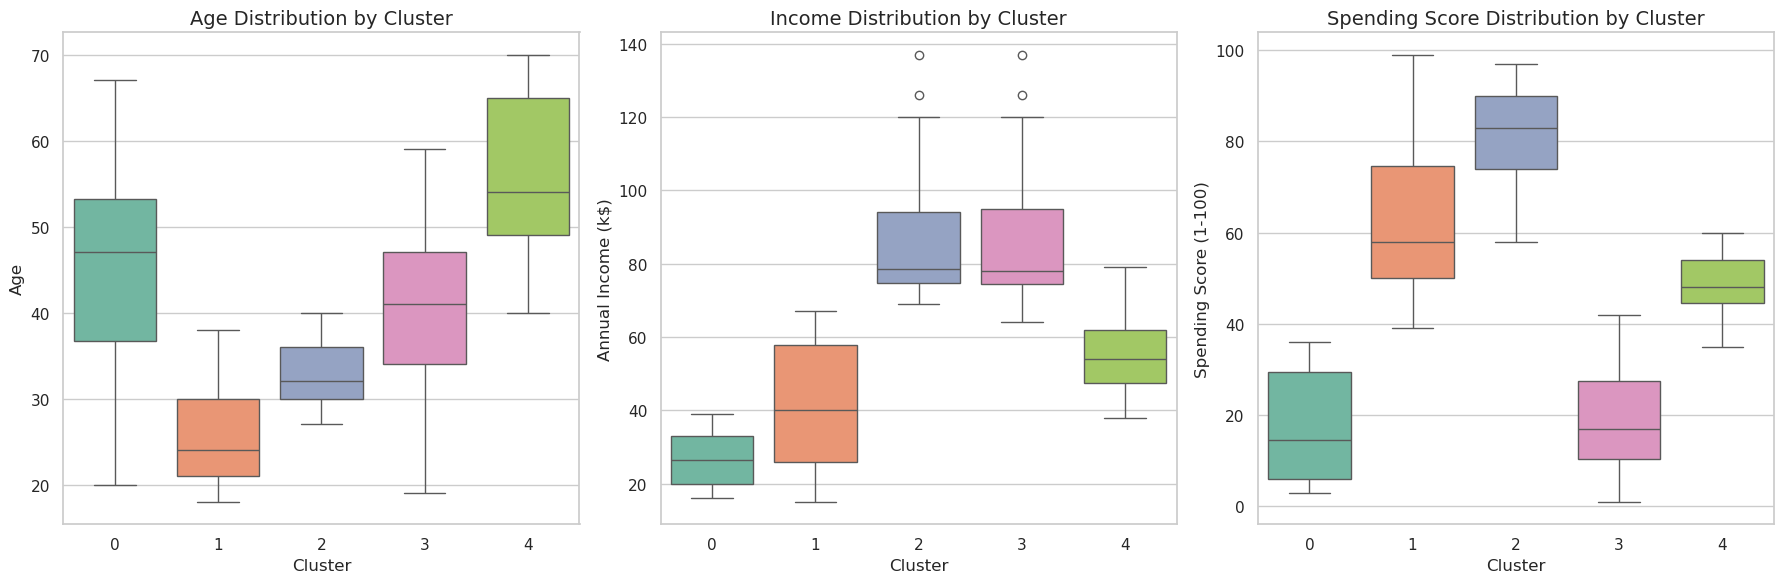

In [27]:
# Visualize the cluster summary
plt.figure(figsize=(18, 6))

# Plot Age distribution by cluster
plt.subplot(1, 3, 1)
sns.boxplot(x='label', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Plot Income distribution by cluster
plt.subplot(1, 3, 2)
sns.boxplot(x='label', y='Annual Income (k$)', data=df, palette='Set2')
plt.title('Income Distribution by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)

# Plot Spending Score distribution by cluster
plt.subplot(1, 3, 3)
sns.boxplot(x='label', y='Spending Score (1-100)', data=df, palette='Set2')
plt.title('Spending Score Distribution by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)

plt.tight_layout()
plt.show()

In [28]:
# Save the final dataframe with cluster labels for future use
df.to_csv('Mall_Customers_Clustered.csv', index=False)

In [29]:
# Final summary of the analysis
print("Analysis Summary:")
print(f"- Total customers analyzed: {df.shape[0]}")
print(f"- Optimal number of clusters: 5")
print(f"- Clusters are based on Age, Annual Income, and Spending Score.")
print(f"- Cluster summary saved to 'Mall_Customers_Clustered.csv'.")

Analysis Summary:
- Total customers analyzed: 200
- Optimal number of clusters: 5
- Clusters are based on Age, Annual Income, and Spending Score.
- Cluster summary saved to 'Mall_Customers_Clustered.csv'.
